# Customer Segmentation 

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import DBSCAN



# Data Exploration and Analysis

In [3]:
# Load the dataset
file_path = '/workspaces/AI-ML-Finance-Course/Customer Segmentation Coding/Mall_Customers - Mall_Customers.csv' 
data = pd.read_csv(file_path)

## Authenticate data is imported correctly and understand data features

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Exploration and Analysis Continued

In [5]:

# Select relevant features analysis, and later clustering

selected_features = data[['Annual Income (k$)', 'Spending Score (1-100)']]


# Observe and analyze the descriptive statistics

In [6]:
print(selected_features.describe())

       Annual Income (k$)  Spending Score (1-100)
count          200.000000              200.000000
mean            60.560000               50.200000
std             26.264721               25.823522
min             15.000000                1.000000
25%             41.500000               34.750000
50%             61.500000               50.000000
75%             78.000000               73.000000
max            137.000000               99.000000


- By running the above code, we get the descriptive statistics of the dataset. As can be seen, all data is intact. This can be seen through the count number seen above. This is important as it means no data filling will need to take place. Additionally, one point which seemed somewhat interesting to me was the two means. The spending score's mean was directly in the middle, whereas the mean of annual income was 60k. 

- Outside of this, nothing particularly interesting comes to mind which suggests the need for further exploration.

## Observe and analyze the histogram distribution 

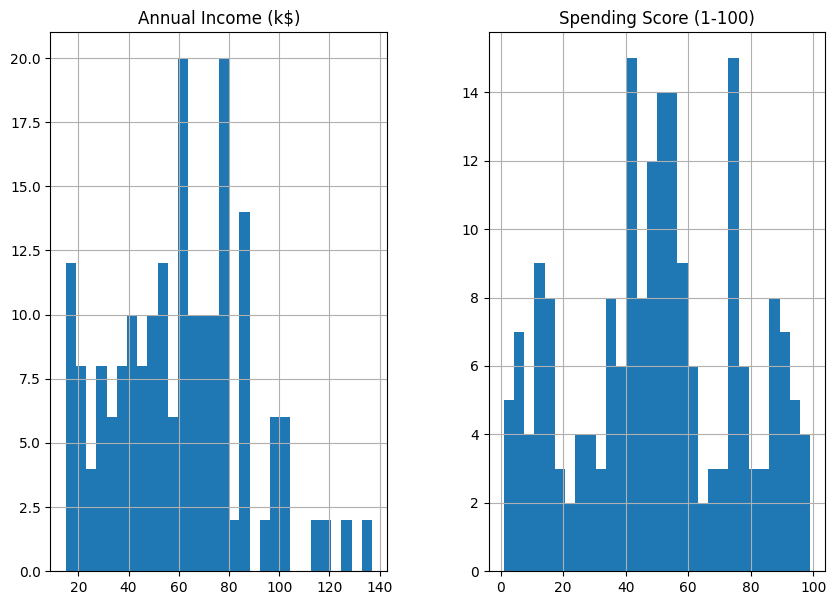

In [7]:
selected_features.hist(bins=30, figsize=(10, 7))
plt.show()

- This to me starts to offer much more interesting insight on the data. On the left, it can be seen that there is a fairly normal distribution of annual incomes around 60k with a few outliers, though not particularly extreme, around 120k-140k. 

- Additionally, the distribution of spending scores is somewhat normal, though there are more than expected scores on either tail. 

## Observe and analyze the boxplot distribution

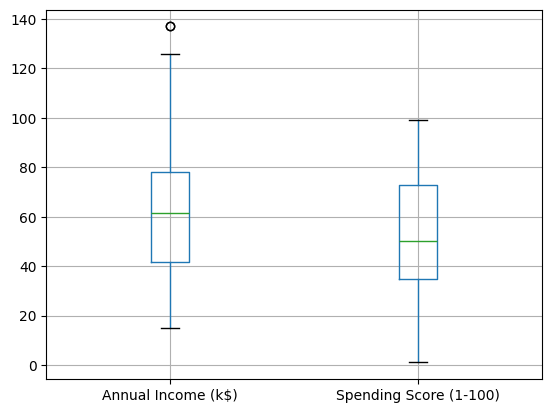

In [8]:
selected_features.boxplot()
plt.show()

- Here it is clear that the one 140k income individual clearly is an outlier. It could be a wise decision to remove this data point, though I am personally curious to see how it skews the data. 

## Observe and analyze the correlation matrix

In [9]:
correlation_matrix = selected_features.corr() 

print(correlation_matrix)

                        Annual Income (k$)  Spending Score (1-100)
Annual Income (k$)                1.000000                0.009903
Spending Score (1-100)            0.009903                1.000000


- As can be seen here there is a weak but positive correlation between the annual income of an individual and the spending score. This is to say that there is a slight expectation that as income increases the spending of the individual would increase as well. This is not to say that one causes the other.

# Now let's make it HOT!


 --- Box Plots of Numerical Features ---


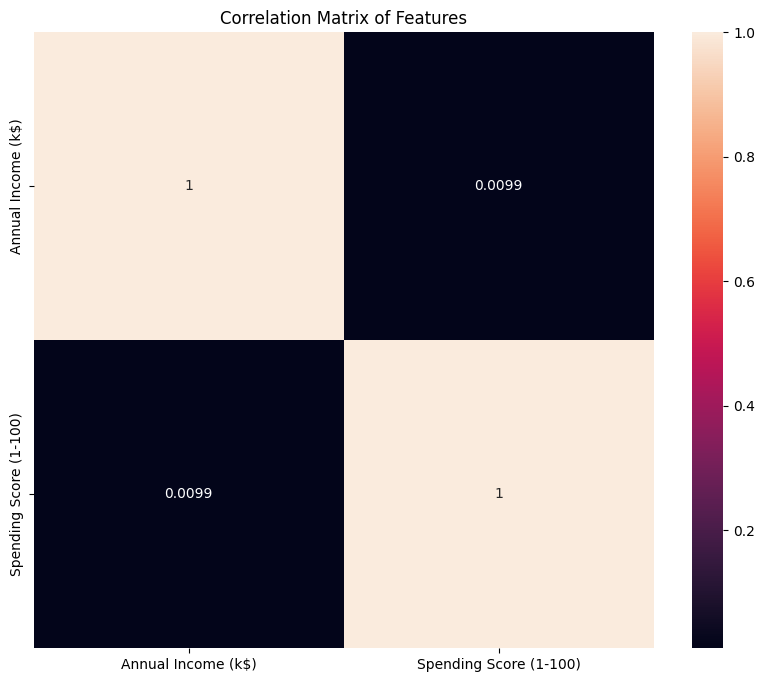

In [10]:
# Calculated correlation matrix visualized as a heatmap

print("\n --- Box Plots of Numerical Features ---")
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Features')
plt.show()


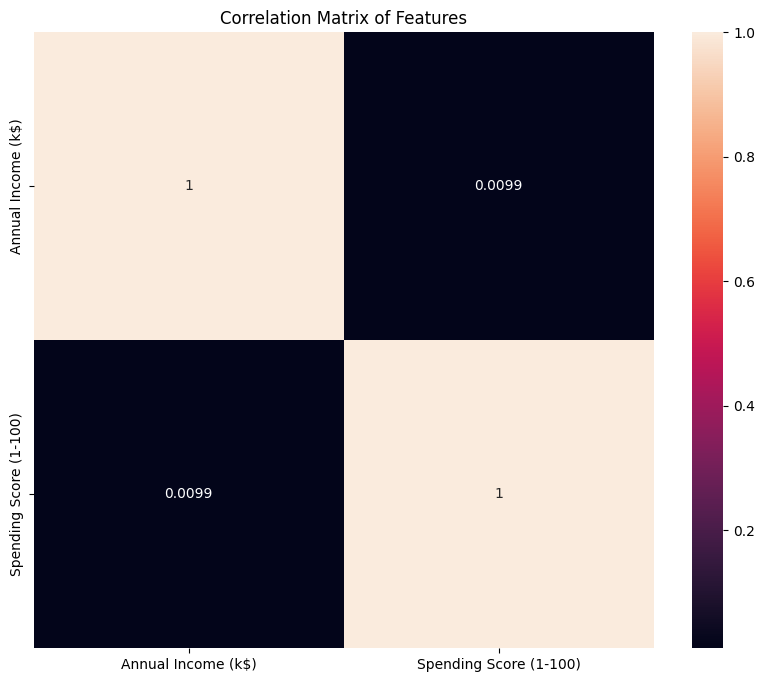

One may ask, why create a heatmap for a 2x2 correlation matrix, and the answer is that it is uneccesary, but helps to visualize the "coldness" and uncorrelated nature of the two target variables. 

# Begin the Enhanced Clustering with K-Means

In [11]:
# Standardize the data for clustering

scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features)

# Apply the K-means clustering 

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=37)
data['Cluster'] = kmeans.fit_predict(scaled_data)

### Introduction to Cluster Evaluation Techniques

In the realm of unsupervised machine learning, determining the optimal number of clusters is a pivotal decision that can significantly impact the outcomes of your model. Cluster evaluation techniques are essential tools that provide guidance in this decision-making process. Two of the most widely recognized methods for evaluating clustering results are the Elbow Method and the Silhouette Score.

#### Elbow Method
- **Explanation**: The Elbow Method is a heuristic used in determining the number of clusters in a data set. The approach involves plotting the explained variance as a function of the number of clusters, and picking the point where the increase in variance explained by adding another cluster is not significant anymore. This point is known as the 'elbow', where the graph bends.
- **Interpretation**: In the Elbow Method, one should look for a change in the gradient of the line plot; a sharp change like an elbow suggests the optimal number of clusters. The idea is that adding more clusters beyond this number does not provide much better modeling of the data.

#### Silhouette Score
- **Explanation**: The Silhouette Score is a metric used to calculate the goodness of a clustering technique. It measures the distance between points within a cluster and the distance to points in the next nearest cluster. The score ranges from -1 to +1, where a high value indicates that the points are well clustered.
- **Interpretation**: A Silhouette Score close to +1 indicates that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

Both methods provide different lenses through which to view the clustering results and can be used in conjunction to make a more informed decision. The Elbow Method gives us an insight into the variance within each cluster, whereas the Silhouette Score provides a measure of how similar an object is to its own cluster compared to others. The optimal number of clusters is often the one that balances between the two measures, subject to the specific context and use case of the analysis.


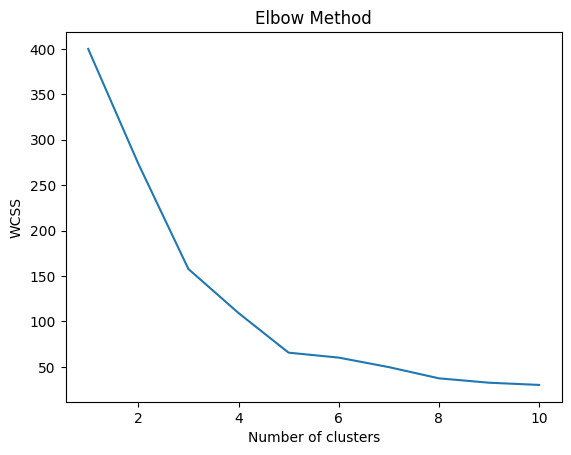

In [12]:
from sklearn.cluster import KMeans

wcss = [] #within-cluster sum of Square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# Justifying the chosen number of clusters. 

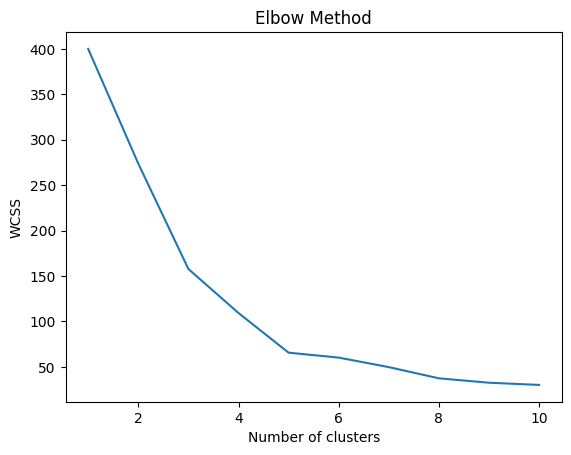

- Based on the graph above, the first suggestion of an elbow can be found at number of clusters = 3. That said, a more robust "elbow" is found at number of clusters = 5. Thus, I will use this number for now, and explore further with a silhouette_score

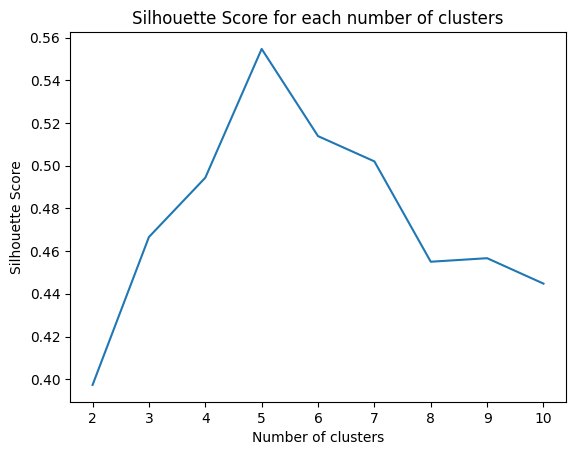

In [13]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score for each number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


## Justifying the chosen number of clusters, continued. 

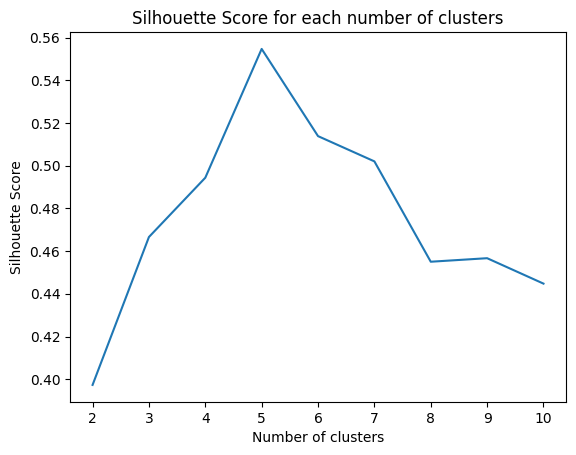

- As can be seen above, the score closest to 1.0 (the prefered scenario, representing a well clustered dataset) is number of clusters = 5. As such, I contend this to be the best option, as it maximizes both the silhouette score, and Elbow Method. 

# Advanced Implementation of Hierarchical Clustering

## An explanation of Dendrogram analysis: 

- https://www.youtube.com/watch?v=ijUMKMC4f9I&ab_channel=365DataScience

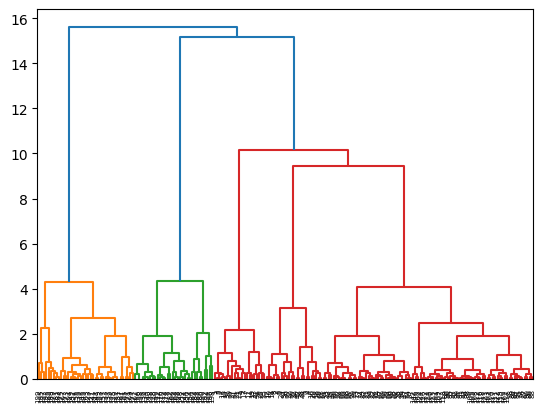

In [14]:
# Prepare for Hierarchical Clustering
Z = linkage(scaled_data, 'ward')
dendrogram(Z)
plt.show()

## Analysis of DendroGram for Hierarchical Clustering 

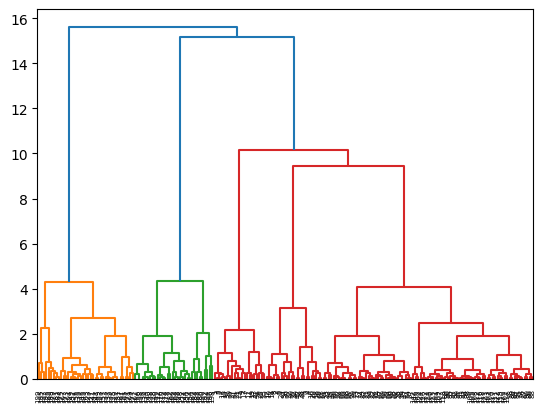

- As can be seen above, the advanced Hierarchical Clustering model utilizing a dendrogram to determine the optimal number of clusters illustrates 5 definitive unique clusters. As can be seen the orange and green clusters are quite unique from the red ones. Additionally, as can be seen through the length of the green and red stems, these are both individually unique from eachother as well. Lastly, the red cluster has a few distinct sub clusters which show differentiation. With the far left cluster representing the most unique cluster, as indicated by its stem.
- The advantage here is that without domain knowledge, understanding how to partion data, and thus utilize traditional -means clustering analysis can be difficult and time consuming. 

# Calculate the Silhouette score for hierarchical clustering

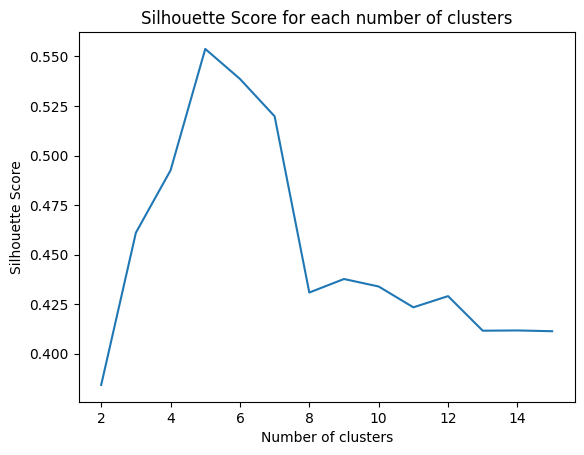

In [15]:

silhouette_scores = []
for i in range(2, 16):
    # Create the clusters
    clusters = fcluster(Z, i, criterion='maxclust')
    # Compute the silhouette score
    score = silhouette_score(scaled_data, clusters)
    silhouette_scores.append(score)

plt.plot(range(2, 16), silhouette_scores)
plt.title('Silhouette Score for each number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Calculate the Davies-Bouldin Index (DBI)

## What is the Davies-Bouldin Index (DBI)? 

- an internal evaluation scheme where lower values represent better partitioning. It is based on a ratio between the within-cluster distances and the between-cluster distances. A lower Davies-Bouldin Index indicates that the clusters are more compact and better separated, which is desirable in a good clustering setup.

In [16]:
db_scores = []
for i in range(2, 11):
    # Create clusters
    clusters = fcluster(Z, i, criterion='maxclust')
    # Compute the Davies-Bouldin score
    score = davies_bouldin_score(scaled_data, clusters)
    db_scores.append(score)

# Find the number of clusters that gives you the minimized Davies-Bouldin score
min_score = min(db_scores)
min_score_index = db_scores.index(min_score)
optimal_clusters = min_score_index + 2 # Add 2 because the range starts at 2

print(f'The optimal number of clusters is {optimal_clusters}')
print(f'The Davies-Bouldin score for {optimal_clusters} clusters is {min_score}')

The optimal number of clusters is 5
The Davies-Bouldin score for 5 clusters is 0.5778621190740154


The optimal number of clusters is 5
The Davies-Bouldin score for 5 clusters is 0.5778621190740154

# Analysis of the Davies-Boulding Index

- The analysis further validates 5 clusters as the optimal score, with a minimum DBI score of 0.5779. 

# Calculate the Calinski-Harabasz Index (Variance Ratio Criterion)

## What is the Calinski-Harabasz Index (Variance Ratio Criterion)?

- This index is also an internal evaluation metric, where a higher score signifies that the clusters are dense and well-separated, which is an indication of a good clustering structure. The Calinski-Harabasz index is particularly useful when comparing clustering algorithms to find the best one for a given dataset.

- Thus, this marks a perfect method to use while preparing for the next phase, comprehensive Cluster Analysis.

In [17]:
ch_scores = []

for i in range(2,11):

    clusters = fcluster(Z, i, criterion='maxclust')

    #Compute the Calinski-Harabasz score

    score = calinski_harabasz_score(scaled_data, clusters)
    ch_scores.append(score)

# Find the number of clusters that gives you the maximized Calinski-Harabasz score

max_score = max(ch_scores)
max_score_index = ch_scores.index(max_score)
optimal_clusters = max_score_index + 2 # Add 2 because the range starts at 2

print(f'The optimal number of clusters is {optimal_clusters}')
print(f'The Calinski-Harabasz score for {optimal_clusters} clusters is {max_score}')


The optimal number of clusters is 9
The Calinski-Harabasz score for 9 clusters is 252.92935867906488


# Analysis of Calculate the Calinski-Harabasz Index (Variance Ratio Criterion)

- The optimal number of clusters is 9
The Calinski-Harabasz score for 9 clusters is 252.92935867906488


## A point of key consideration

- While a clustering that maximes the Calinski-Harabasz index might produces the most well-seperated internal structure for the dataset, it is also important to consider interpretability in the importance of your model. As can be seen in the dendrogram above, having "too many clusters" can result in lack of interprtability, which in the case of fraud detection, for example, can be a disqualifying factor when pushing to live production.

# Comprehensive Cluster Analysis

- Here I will both analyze the characteristics of the clusters from both clustering methods 
- utilizing average silhouette score, davies-boulding, and Calinski Harabasz as the basis for comparative 
- analysis, with a provision on interpretability to cap the analysis.

## Characteristic of Cluster Analysis

### Average Silhouette Score

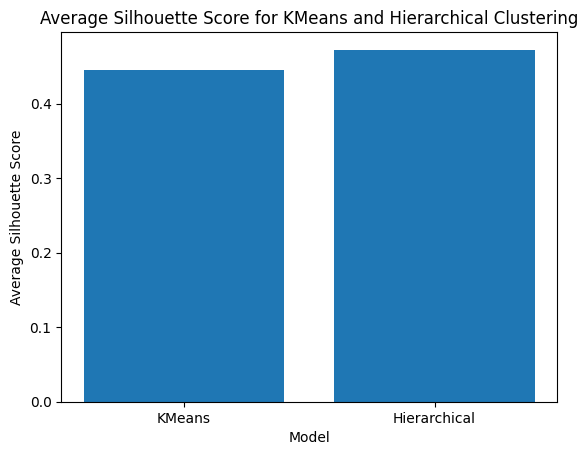

In [18]:
# Calculate the average silhouette score for KMeans and hierarchical clustering

#kmeans.labels_ allows the labels of the clusters to be accessed

k_means_silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)

# the same is not true for fcluster, so the following method is devised. 

silhouette_scores = []
for i in range(2, 11):
    # Create clusters
    clusters = fcluster(Z, i, criterion='maxclust')
    # Compute the silhouette score
    score = silhouette_score(scaled_data, clusters)
    silhouette_scores.append(score)

# Calculate the average silhouette score across all numbers of clusters
hierarchical_silhouette_avg = sum(silhouette_scores) / len(silhouette_scores)

# Initiate for bar graph

models = ['KMeans', 'Hierarchical']
scores = [k_means_silhouette_avg, hierarchical_silhouette_avg]

plt.bar(models, scores)
plt.xlabel('Model')
plt.ylabel('Average Silhouette Score')
plt.title('Average Silhouette Score for KMeans and Hierarchical Clustering')
plt.show()


- In the context of silhouette scores, when we talk about the "average silhouette score", we're referring to the mean of the silhouette scores of all samples in your dataset. This gives us a single value that represents the overall quality of our clustering. A higher average silhouette score indicates better clustering.

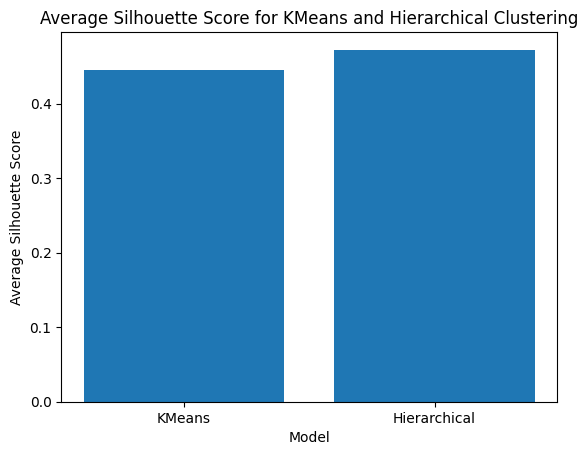

- Therefore, the bar graph above illustrates a stronger average silhoutte score for the hierarchical clustering technique. That said, more data would be necessary in order to run multiple runs of this 'experiment' across different data sets in order to test statistical significance of differences.

## Davies-Boulding Index comparative analysis

- A reminder, the Davies-Bouldin index (DBI) is a metric for evaluating clustering algorithms, similar to the silhouette score. The DBI compares the average similarity between clusters, where the similarity is a measure that combines:

1. The distance between clusters, and

2. The size of the clusters.

- Specifically, for each cluster, the DBI calculates the average distance between all points within that cluster (a measure of the cluster's size or "spread"), and the distance from that cluster to all other clusters. The DBI is the average of the worst-case values of these ratios for all clusters.

- A lower DBI indicates better clustering. A DBI of 0 indicates the best possible clustering, where each cluster is compact (small "spread") and far from all other clusters. Higher DBI values indicate either clusters that are less compact, clusters that are closer together, or both.

Davies-Bouldin Index for K-means clustering: 0.5722
Davies-Bouldin Index for Hierarchical clustering: 0.5779


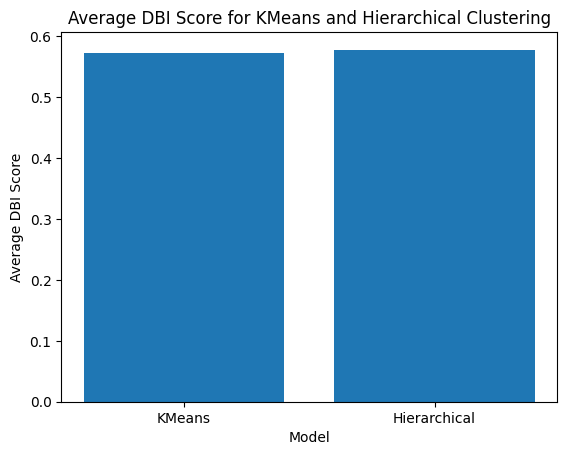

In [19]:
# Optimal DBI score for KMeans

db_scores_kmeans = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 37)
    kmeans.fit(scaled_data)
    clusters = kmeans.labels_
    score = davies_bouldin_score(scaled_data, clusters)
    db_scores_kmeans.append(score)

# Find the number of clusters that gives you the minimized Davies-Bouldin score

min_score_kmeans = min(db_scores_kmeans)
min_score_index_kmeans = db_scores_kmeans.index(min_score_kmeans)
optimal_clusters_kmeans = min_score_index_kmeans + 2 # Add 2 because the range starts at 2

# Optimal DBI score for Hierarchical Clustering

db_scores = []
for i in range(2, 11):
    # Create clusters
    clusters = fcluster(Z, i, criterion='maxclust')
    # Compute the Davies-Bouldin score
    score = davies_bouldin_score(scaled_data, clusters)
    db_scores.append(score)

# Find the number of clusters that gives you the minimized Davies-Bouldin score
min_score = min(db_scores)
min_score_index = db_scores.index(min_score)
optimal_clusters = min_score_index + 2 # Add 2 because the range starts at 2


# Print the DBI Scores for each model 

print(f'Davies-Bouldin Index for K-means clustering: {min_score_kmeans:.4f}')
print(f'Davies-Bouldin Index for Hierarchical clustering: {min_score:.4f}')

# Initiate for bar graph

models_DBI = ['KMeans', 'Hierarchical']
scores_DBI = [min_score_kmeans, min_score]

plt.bar(models_DBI, scores_DBI)
plt.xlabel('Model')
plt.ylabel('Average DBI Score')
plt.title('Average DBI Score for KMeans and Hierarchical Clustering')
plt.show()

## Analysis of results

- Remembering that above we are looking for a lower DBI score...

Davies-Bouldin Index for K-means clustering: 0.5722

Davies-Bouldin Index for Hierarchical clustering: 0.5779

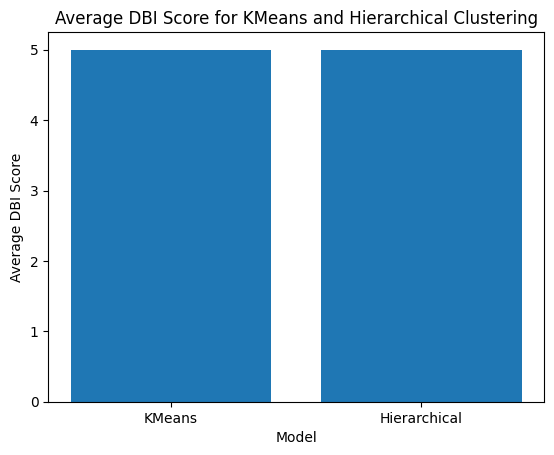

- We can see that the two DBI scores are extremely close. That said, the K-means clustering score is slightly lower, the significance of this difference would have to be tested across multiple data sets in the future, compares to the Hierarchical Clustering. 

## Calinski-Harabasz Index (Variance Ratio Criterion) Comparative Analysis

- A reminder, the Calinski-Harabasz Index, also known as the Variance Ratio Criterion, is a metric used for evaluating clustering algorithms. It compares the dispersion within clusters and the dispersion between clusters.

- Specifically, it is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared).

- A higher Calinski-Harabasz Index relates to a model with better defined clusters. When the index is high, the clustering model has smaller clusters that are well separated. Therefore, when evaluating clustering models with this index, a higher value is better.

CHI Score for K-means clustering: 0.5722
CHI Score for Hierarchical clustering: 0.5779


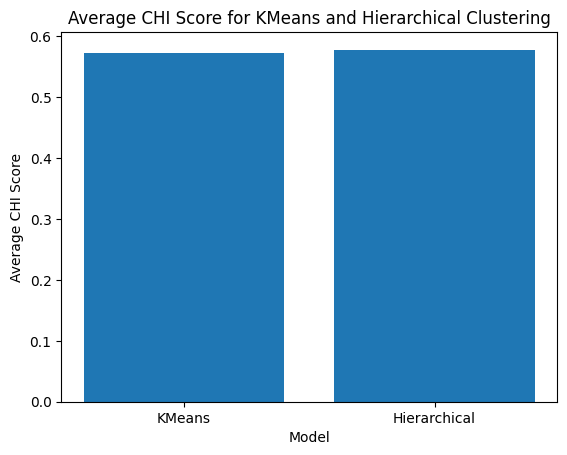

In [20]:
# Optimal CHI score for KMeans

CHI_scores_kmeans = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 37)
    kmeans.fit(scaled_data)
    clusters = kmeans.labels_
    score = calinski_harabasz_score(scaled_data, clusters)
    CHI_scores_kmeans.append(score)

# Find the number of clusters that gives you the minimized Davies-Bouldin score

max_score_kmeans = max(CHI_scores_kmeans)
max_score_index_kmeans = CHI_scores_kmeans.index(max_score_kmeans)
optimal_clusters_kmeans = max_score_index_kmeans + 2 # Add 2 because the range starts at 2

# Optimal CHI score for Hierarchical Clustering

CHI_scores = []
for i in range(2, 11):
    # Create clusters
    clusters = fcluster(Z, i, criterion='maxclust')
    # Compute the Davies-Bouldin score
    score = calinski_harabasz_score(scaled_data, clusters)
    db_scores.append(score)

# Find the number of clusters that gives you the minimized Davies-Bouldin score
min_score = min(db_scores)
min_score_index = db_scores.index(min_score)
optimal_clusters = min_score_index + 2 # Add 2 because the range starts at 2


# Print the CHI Scores for each model 

print(f'CHI Score for K-means clustering: {min_score_kmeans:.4f}')
print(f'CHI Score for Hierarchical clustering: {min_score:.4f}')

# Initiate for bar graph

models_DBI = ['KMeans', 'Hierarchical']
scores_DBI = [min_score_kmeans, min_score]

plt.bar(models_DBI, scores_DBI)
plt.xlabel('Model')
plt.ylabel('Average CHI Score')
plt.title('Average CHI Score for KMeans and Hierarchical Clustering')
plt.show()

# Analysis of Results

- Remembering that above we are looking for a HIGHER Chi Score, this is due to the formula of CHI score which measures the ratio of between individual cluster dispersion (this number should be higher, as it would represent a more dispersed and segmented set of customers) and minimize the denominator, the intercluster dispersion (meaning how tighlty clsutered is this individual cluster). 

- Thus, we can take this information and analyze the CHI scores of: 

K-means clustering: 0.5722
Hierarchical clustering: 0.5779

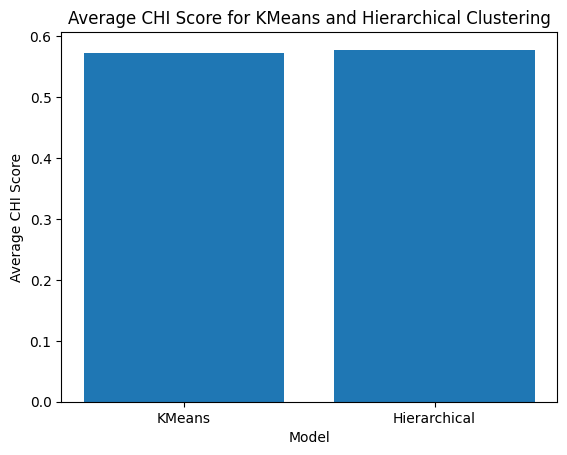

- And understand that there is a slight advantage to the Hierarchical clustering model. 

- Strangely, the CHI score is the same as the DBI score here. Further analysis would be necessary to understand the reason.

# Insightful Reporting and Visualization

- As seen above, the metrics used create a fairly nuanced understanding of the difference between K-means and Hierarchical Clustering, including insightful visualization of all methods utilized for easy comparison. The reported advantages seem to be quite minimal, but the only real advantage seems to be the allowed increase in complexity within the Hierarchical Clustering model. If interpretability was not important, ie a black box approach was acceptable, then this would illustrate a small advantage. 

- The use of clustering methods such as there are quite clear when considering marketing. Let's say Wells Fargo wanted to launch targeted marketing campaigns for its new savings account products. As such, it would likely desire to segment its customer base through their financial behaviors and needs, for example utilizing variables such as income level, credit score, transaction frequency, or occupation (of course subject to the specific regulations at the time). 

- This would allow the company to create targeted marketing campaigns for each segment, promoting the products which are most relevant to the financial behaviors and needs of individual population segments. This would likely increase product uptake, customer satisfaction, and ultimately generate more top-line revenu for the company (great outcome variables to measure).

# Implementing and Comparing DBSCAN Clustering

- This section will start by implementing the DBSCAN clustering method

- Then, the optimized parameters will be calculated utilizing silhouette score, CHI score, and DBI score

- Finally, we will compare the output using CHI, DBI, and Silhoutte Scores numerically and graphically. 

## First, let's understand what DBSCAN Clustering is: 

- DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular density-based clustering algorithm. Unlike partitioning-based clustering methods like K-means or hierarchical clustering, DBSCAN does not require the user to specify the number of clusters in advance, and it can discover clusters of arbitrary shape, not just spherical ones.

- DBSCAN works by defining a cluster as a maximal set of density-connected points. It has two main parameters:

    1. eps: The maximum distance between two samples for them to be considered as in the same neighborhood.

    2. min_samples: The number of samples in a neighborhood for a point to be considered as a core point. This includes the point itself.

- DBSCAN starts with an arbitrary point in the dataset, and if there are at least min_samples points within a radius of eps from that point, a new cluster is created. The algorithm then iteratively adds all directly reachable points to the cluster. The process continues until no more points can be added to the cluster, and then a new unvisited point is selected and processed, leading to the discovery of a further cluster or noise.

- DBSCAN is particularly useful for tasks where you need to identify clusters of similar data points in large datasets, and the clusters may not be spherical and may have noise (i.e., outliers). It's often used in spatial data analysis, anomaly detection, image segmentation, and density estimation. However, it can struggle with clusters of different densities and high-dimensional data.

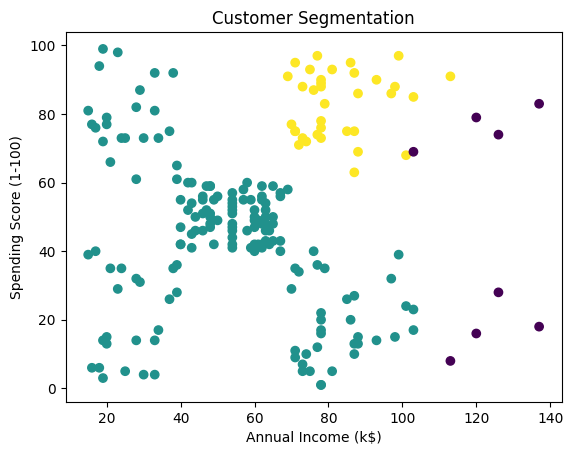

In [21]:
# Implementing the DBSCAN Clustering Method

dbscan = DBSCAN(eps=0.5, min_samples=5)

data['Cluster'] = dbscan.fit_predict(scaled_data)


# Visualize the clusters (for two features)

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')

plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


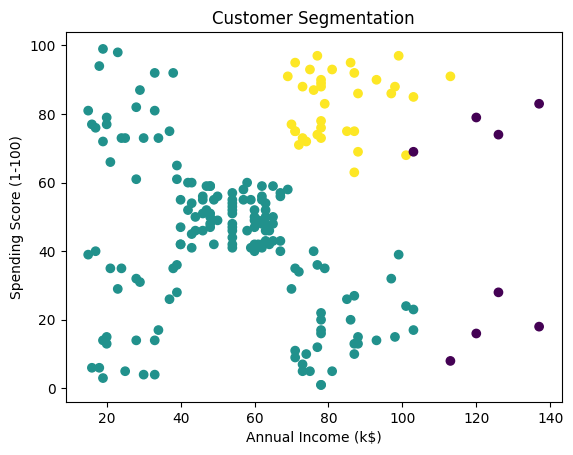

Best eps=0.9, min_samples=9 with silhouette score=0.451339683983883


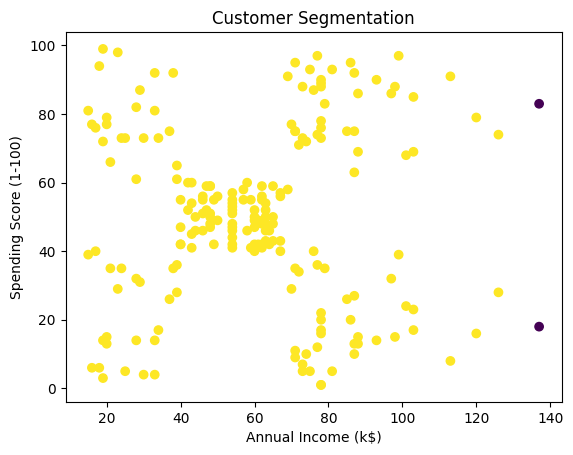

In [22]:
# Grid search for DBSCAN utilizing the silhouette score

# Define parameter range
eps_values = np.linspace(0.1, 1, 10)  # Example range, adjust as needed
min_samples_values = range(2, 10)  # Example range, adjust as needed

best_score = -1
best_eps = None
best_min_samples = None

# Grid search
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(scaled_data)
        if len(set(clusters)) > 1:  # No point in calculating score for a single cluster
            score = silhouette_score(scaled_data, clusters) # This create a competition 
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f'Best eps={best_eps}, min_samples={best_min_samples} with silhouette score={best_score}')

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)

data['Cluster'] = dbscan.fit_predict(scaled_data)

# Visualize the clusters (for two features)

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')

plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

- If one wishes to maximize for silhouette score, the strongest model is DBSCAN with eps=0.9, and min_samples=9

- for a silhouette score of 0.4513

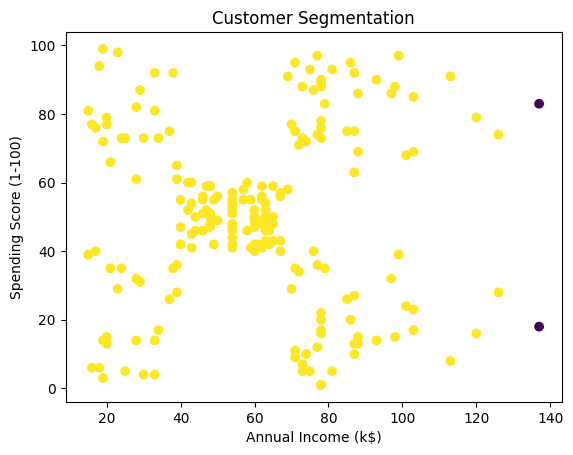

However, one can see that utilizing this technique can be somewhat misleading, as grouping with only two segments, with only two points as outliers would likely not provide the nuance necessary for effective clustering.

Best eps=0.9, min_samples=8 with DBI score=0.3708841303810936


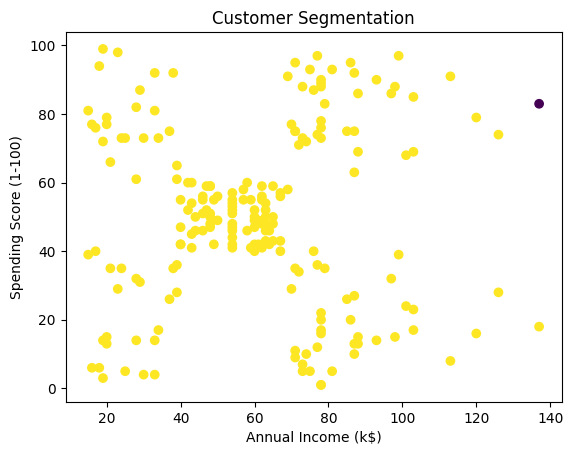

In [23]:
# Grid search for DBSCAN utilizing the DBI score


# Define parameter range
eps_values = np.linspace(0.1, 1, 10)  # Example range, adjust as needed
min_samples_values = range(2, 10)  # Example range, adjust as needed

best_score = np.inf
best_eps = None
best_min_samples = None

# Grid search
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(scaled_data)
        if len(set(clusters)) > 1:  # No point in calculating score for a single cluster
            score = davies_bouldin_score(scaled_data, clusters)
            if score < best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f'Best eps={best_eps}, min_samples={best_min_samples} with DBI score={best_score}')

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)

data['Cluster'] = dbscan.fit_predict(scaled_data)

# Visualize the clusters (for two features)

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')

plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

- If one wishes to minimize the DBI score, the strongest model is DBSCAN with epis = 0.9, and min_samples = 8.

- for a DBI score of 0.3709

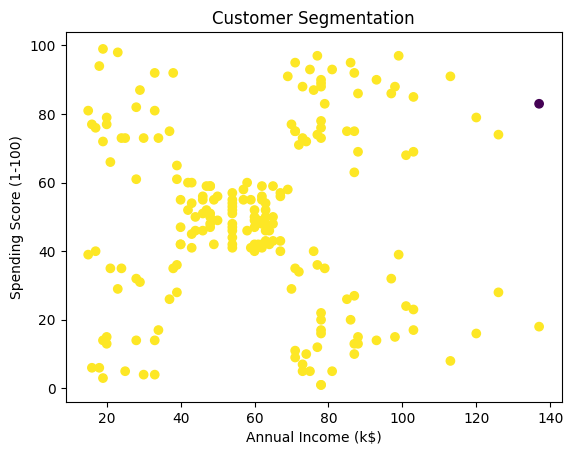

Again, we run into a similar problem here utilizing the DBI score. We have no real group segmentation here, so looking to the DBI score here would likely not be an effective tool. 

Best eps=0.30000000000000004, min_samples=3 with CHI score=105.09849320946482


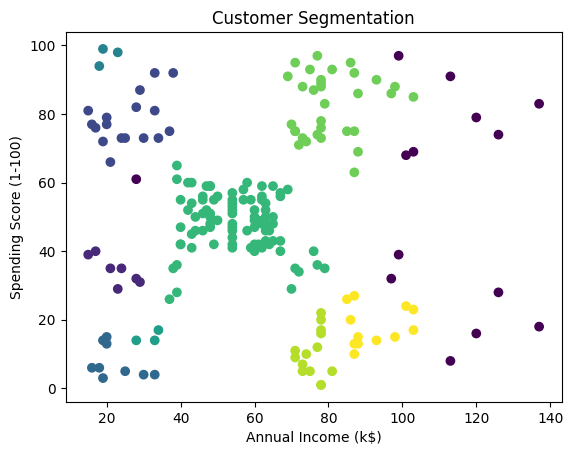

In [24]:
# Grid search for DBSCAN utilizing the CHI score

# Define parameter range
eps_values = np.linspace(0.1, 1, 10)  # Example range, adjust as needed
min_samples_values = range(2, 10)  # Example range, adjust as needed

best_score = -np.inf
best_eps = None
best_min_samples = None

# Grid search
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(scaled_data)
        if len(set(clusters)) > 1:  # No point in calculating score for a single cluster
            score = calinski_harabasz_score(scaled_data, clusters)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f'Best eps={best_eps}, min_samples={best_min_samples} with CHI score={best_score}')

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)

data['Cluster'] = dbscan.fit_predict(scaled_data)

# Visualize the clusters (for two features)

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')

plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

- If one wishes to maximize the Chi Score, the strongest model is DBSCAN with eps = 0.30000000000000004, min_samples 3, with a resulting CHI score of 105.10. 

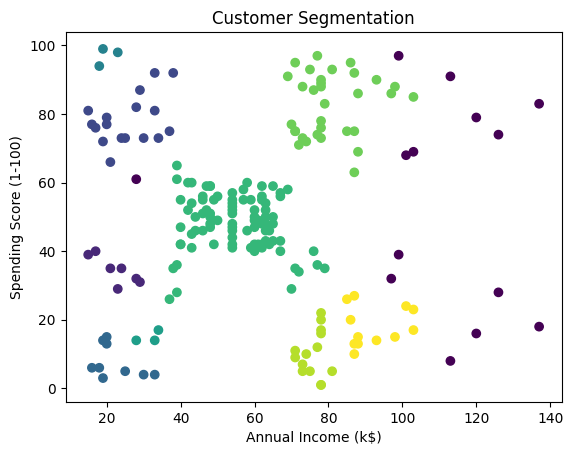

As can be seen, it results in a somewhat confusing, but likely useful clustering of the data. The exact clusters could be taken from inside the data set clusters index.

## Comparison of DBSCAN to K-means and Hierarchical Clustering


In [25]:
dbscan_silhouette_score = 0.4513
dbscan_dbi_score = 0.3709
dbscan_chi_score = 105.10

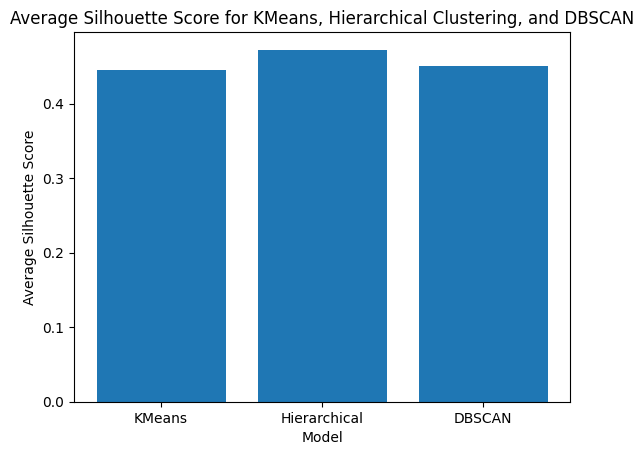

In [26]:
# Silhouette score analysis

models = ['KMeans', 'Hierarchical', 'DBSCAN']
scores = [k_means_silhouette_avg, hierarchical_silhouette_avg, dbscan_silhouette_score]

plt.bar(models, scores)
plt.xlabel('Model')
plt.ylabel('Average Silhouette Score')
plt.title('Average Silhouette Score for KMeans, Hierarchical Clustering, and DBSCAN')
plt.show()

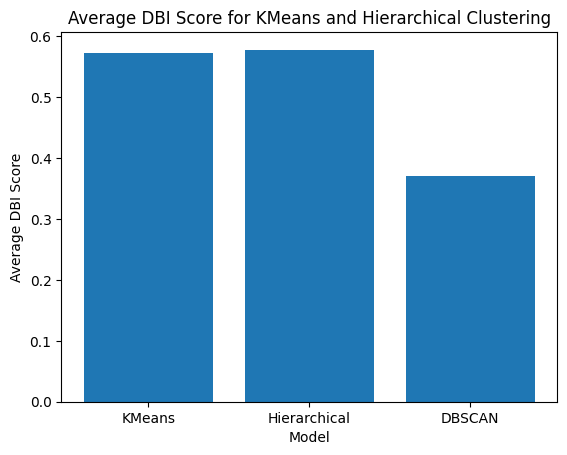

In [30]:
# DBI score analysis

models_DBI = ['KMeans', 'Hierarchical', 'DBSCAN']
scores_DBI = [min_score_kmeans, min_score, dbscan_dbi_score]

plt.bar(models_DBI, scores_DBI)
plt.xlabel('Model')
plt.ylabel('Average DBI Score')
plt.title('Average DBI Score for KMeans and Hierarchical Clustering')
plt.show()

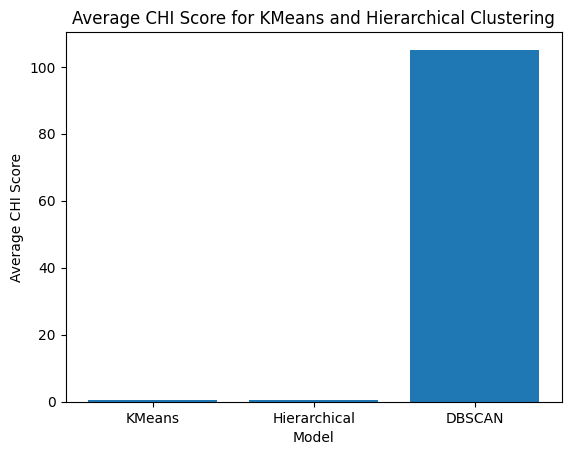

In [31]:
# Chi score analysis 

# Initiate for bar graph

models_DBI = ['KMeans', 'Hierarchical', 'DBSCAN']
scores_DBI = [min_score_kmeans, min_score, dbscan_chi_score]

plt.bar(models_DBI, scores_DBI)
plt.xlabel('Model')
plt.ylabel('Average CHI Score')
plt.title('Average CHI Score for KMeans and Hierarchical Clustering')
plt.show()

As can be seen by the above bar graphs, DBSCAN is outperformed by the other methods except when utilizing a CHI Score analysis. 

## Dimensionality Reduction Technique

- In the following section I will: 

    1. apply PCA to the data and visualize the results. 
    2. Discuss how dimensionality reduction impacts the clustering results and its potential use in simplifying complex datasets.


### But first, what is PCA? 

- Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

- The number of principal components is less than or equal to the number of original variables. The first principal component accounts for as much of the variability in the data as possible, and each succeeding component accounts for as much of the remaining variability as possible.

- PCA is mainly used as a tool in exploratory data analysis and for making predictive models.

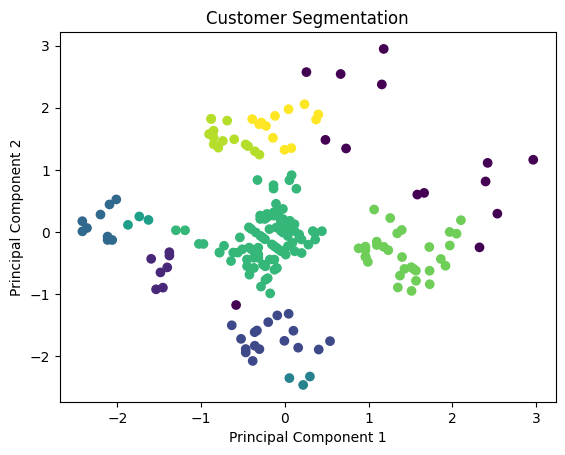

In [29]:
# Apply PCA to the data and visualize the results

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_data = pca.fit_transform(scaled_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data['Cluster'], cmap='viridis')

plt.title('Customer Segmentation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### Visualization of the PCA Result

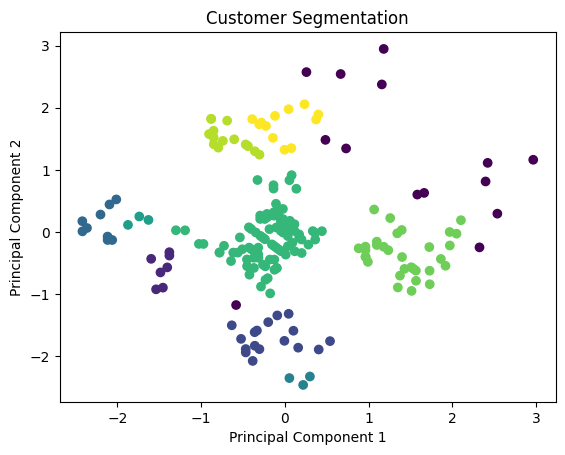

### Impact on Clustering Results:

Dimensionality reduction can have a significant impact on the results of clustering algorithms. High-dimensional data can suffer from the "curse of dimensionality", where points in high-dimensional space are all far apart from each other, making it hard to form meaningful clusters. By reducing the dimensionality, we can alleviate this issue and potentially improve the clustering results.

Moreover, dimensionality reduction can help to remove noise and redundancy from the data, which can lead to more meaningful and distinct clusters. It can also make the clustering process more efficient by reducing the computational cost.

### Use in Simplifying Complex Datasets:

Dimensionality reduction is particularly useful when dealing with complex datasets with many features. It can simplify these datasets by reducing them to a smaller set of features (principal components) that still capture the main patterns in the data.

This simplification can make subsequent analyses, such as clustering or classification, more efficient and effective. It can also make it possible to visualize the data in two or three dimensions, which can provide valuable insights.

However, it's important to remember that dimensionality reduction involves a trade-off between simplicity and retaining the original information in the data. The choice of how much dimensionality to reduce should be guided by the specific requirements of your analysis and the nature of your data.

### Real-World Application

#### Business Scenario:

Let's imagine we are working with a large e-commerce company that sells a wide variety of products. The company has a vast customer base with diverse shopping behaviors. They want to understand their customers better to provide personalized shopping experiences, improve customer satisfaction, and ultimately increase sales.

The company has collected a large amount of customer data, including demographic information, browsing history, purchase history, product ratings, and feedback. However, the high dimensionality of this data makes it challenging to analyze and extract meaningful insights.

#### Application of PCA and Clustering:

We can use PCA to reduce the dimensionality of this data. By transforming the high-dimensional customer data into a lower-dimensional space, PCA can help us identify the key patterns and structures in the data that explain the most variance in customer behavior. This can simplify the data and make it easier to analyze, without losing too much important information.

Once we've reduced the dimensionality of the data, we can apply a clustering algorithm to segment the customers into distinct groups based on their shopping behaviors. Each cluster will represent a group of customers with similar characteristics and behaviors.

#### Strategic Insights:

The customer segmentation can provide valuable strategic insights for the company:

    1. Personalized Marketing: The company can tailor its marketing strategies to each customer segment, promoting products that are likely to appeal to each group. This can increase the effectiveness of marketing campaigns and improve customer engagement.

    2. Product Recommendation: The company can use the customer segments to improve its product recommendation system. By understanding the preferences of each segment, the company can recommend products that are likely to be of interest to each customer.

    3. Customer Retention: By understanding the characteristics of each customer segment, the company can identify segments that are more likely to churn and develop strategies to retain these customers.

    4. New Product Development: Insights from customer segments can inform the development of new products that cater to the needs and preferences of each segment.

#### Justification of Techniques:

PCA is a suitable technique for this scenario because it can handle the high dimensionality of the customer data and simplify it for analysis. It can identify the key patterns in the data that explain the most variance in customer behavior.

Clustering is a suitable technique for customer segmentation because it can group customers based on their shopping behaviors. This can reveal the underlying structure of the customer base and provide valuable insights for strategic decision-making.

This approach is practical because it can handle large amounts of data and provide actionable insights. It's also creative because it uses advanced machine learning techniques to understand customer behavior and inform business strategies.